# LangChain Legacy Syntax
* Notebook by Adam Lang
* Date: 6/9/2024
* This notebook will go over and demonstrate implementing the LangChain "Legacy" Syntax

# So what is the "LangChain Legacy Syntax"?
* Prior to August 2023, LLM chains were created using this syntax
* As a result, LangChain has now labeled them "legacy chains".
* The current syntax in LangChain is **LCEL** or **LangChain Expression Language**.
* However, NOT ALL legacy chains are now LCEL chains.
* Legacy Syntax Flow:

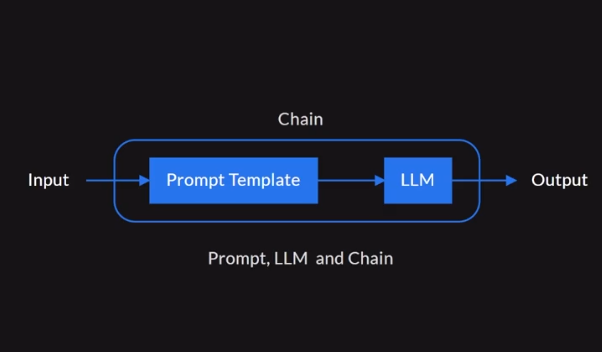

* The "Chain" is a sequence or a pipeline of steps
* They are known as "calls" in LangChain
* The Chain we see above is:
1. Input
2. Prompt Template
3. Send to LLM
4. Output
* The "chain" itself is in the blue boxes (prompt template --> LLM)

* The steps are typicall "calls" such as:
  * Calling an LLM
  * Calling a tool --> talk to agent
  * Calling a retriever --> retrieve from vector DB
  * Calling a preprocessing operation


## Legacy Chain - More Details
* Constructed by subclassing from legacy Chain class.
* **DO NOT use LCEL but have their own implementation logic.**
* Many are being deprecated, so you need to check most current LangChain releases and docs.
* Some are still used as there is not LCEL variant yet.
* Examples of **Chain** subclasses:
  * 1. LLM Chain
  * 2. RetrievalQA
  * 3. SequentialChain
  * etc....
* Most common Legacy Chains include:

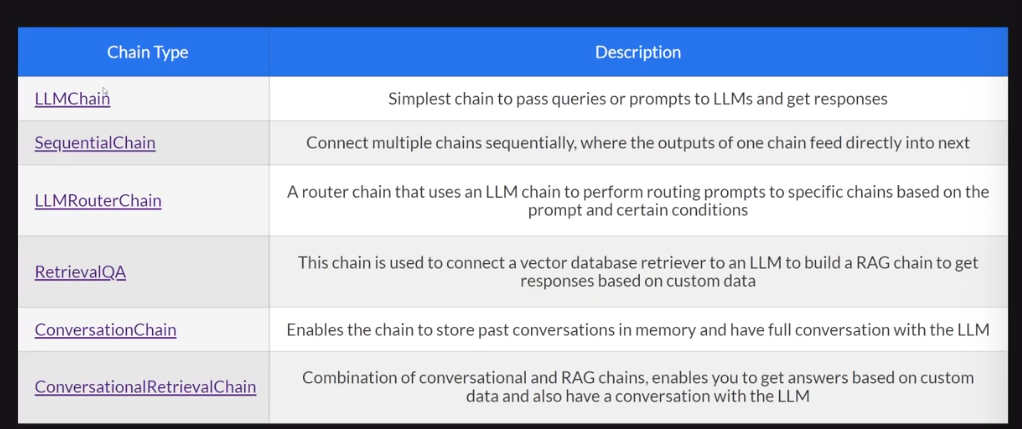


* LLMChain - simplest chain
* SequentialChain - multiple chains together
* LLMRouterChain - chaining specific chains together based on prompt and conditions.
* RetrievalQA - retrieves data from a vector DB --> build a RAG chain
* ConversationChain - memory storage, allows Question and Answer.
* ConversationRetrievalChain - RAG + conversation
* Legacy Chain example:
1. create connection to ChatGPT
2. create prompt (query)
3. chain prompt with LLM
4. invoke chain response

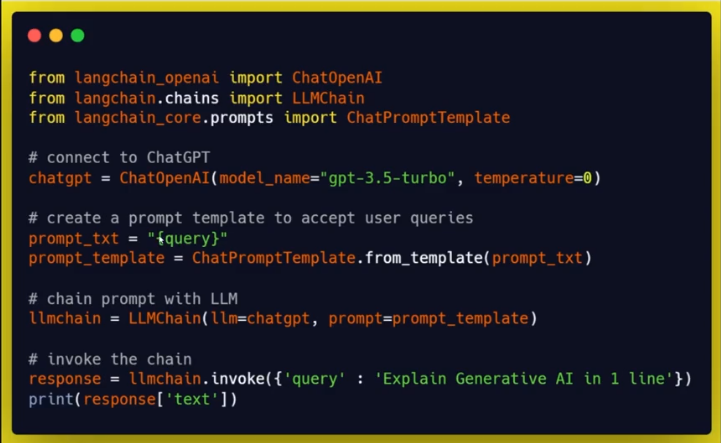


# LangChain Legacy Chain - Implementation
* This is a simple example.


## Install libraries

In [1]:
## install libraries
!pip install langchain==0.1.19
!pip install langchain-openai==0.1.6 ## LLM connection to OpenAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## OpenAI API Credentials

In [2]:
from getpass import getpass ## user enters their key

OPENAI_KEY = getpass("Please enter OpenAI API key: ")

Please enter OpenAI API key: ··········


In [3]:
## import os and openai api key
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## Connect to LLM (ChatGPT)

In [4]:
# need to import ChatOpenAI
from langchain_openai import ChatOpenAI

# instantiate the ChatOpenAI model
chatgpt = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0) # temp 0 is less random

## Create Chain to LLM
* This has 2 steps
1. Prompt Template
2. Chain creation

In [5]:
from langchain.chains import LLMChain
from langchain_core.prompts import ChatPromptTemplate

# Step 1: create a prompt template for user queries
prompt_text = "{query}" # send a question to the LLM
prompt_template = ChatPromptTemplate.from_template(prompt_text)

## Step 2: Create Chain
llm_chain = LLMChain(llm=chatgpt, prompt=prompt_template)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


Note: As we can see `LLMChain` has been deprecated in the newest LangChain releases, which is why are are demonstrated this "legacy syntax".
* Deprecated docs: https://api.python.langchain.com/en/latest/chains/langchain.chains.llm.LLMChain.html

## Run LLM Chain

In [7]:
response = llm_chain.invoke({'query' : 'Explain in a few sentences why air planes are not able to fly over the Tibetan plateau'})

# print response
print(response['text'])

Airplanes are not able to fly over the Tibetan plateau due to its high altitude and unpredictable weather conditions. The plateau is known for its extreme cold temperatures, strong winds, and turbulence, which can pose a risk to aircraft safety. Additionally, the lack of suitable airports and emergency landing sites in the region further restricts air travel over the Tibetan plateau.


# Summary
* This is the most basic example of how to build and run a legacy LLM chain using LangChain with the legacy syntax.
* We will show other examples using LCEL and more advanced use cases in other notebooks.